### Student Information
Name: Stanislav Vatutin

Student ID: 108065426

GitHub ID: Picklestan

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

  
# Homework starts







   
## Section 1 
(Tasks from the lab)




   
Here the part of homework, containing the tasks from the lab, starts.
First, here is the copied part of code, preparing the data for the first task.

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)





Again, code above is just the copied code for the data transformation:

In [2]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))



   
   
   
   *****
       
       
         
   
   
   


 

### >>> **Exercise 3 (take home)**  
<font color=#7e008c>In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)</font>


We can check all unique category names

In [3]:
X.category_name.unique()

array(['comp.graphics', 'soc.religion.christian', 'sci.med',
       'alt.atheism'], dtype=object)

<br/>
<br/>
<br/>
<br/>
<br/>
Here is an example of Selecting text and category_name of all the items whats category_name IS NOT in the specified list, 
and then sorting it by category names

In [126]:


X[~X.category_name.isin(['sci.med', 'southnepalliterature', 'nuclearphysic'])].sort_values('category')[["text", "category_name"]]

,text,category_name
1153,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,alt.atheism
1130,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,alt.atheism
1133,From: mcgoy@unicorn.acs.ttu.edu (David McGaugh...,alt.atheism
1138,From: jbrown@batman.bmd.trw.com Subject: Re: D...,alt.atheism
1144,cs.utexas.edu!uunet!olivea!sgigate!sgiblab!ad...,alt.atheism
...,...,...
418,From: Eugene.Bigelow@ebay.sun.com (Geno ) Subj...,soc.religion.christian
1706,From: storrs@eos.ncsu.edu (JERRY STORRS) Subje...,soc.religion.christian
191,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,soc.religion.christian
1697,From: dohertyl@dcs.gla.ac.uk (dohertyl) Subjec...,soc.religion.christian


<br/>
<br/>
<br/>
<br/>
<br/>
Creating new column with text length and then selecting units witj text length exceeding 1000 and having category "1" 


In [3]:
X['length']=X['text'].str.len()
X[(X.category == 1) & (X.length >= 1000)][['text', 'length', 'category_name']]

,text,length,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1004,comp.graphics
24,From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...,1920,comp.graphics
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,1430,comp.graphics
48,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1507,comp.graphics
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1926,comp.graphics
...,...,...,...
2214,From: tychay@cco.caltech.edu (Terrence Y. Chay...,1420,comp.graphics
2220,From: idr@rigel.cs.pdx.edu (Ian D Romanick) Su...,1264,comp.graphics
2226,From: nahess@mir.gatech.edu (Nicholas A. Hess)...,1196,comp.graphics
2232,From: lipman@oasys.dt.navy.mil (Robert Lipman)...,3071,comp.graphics


So, i hope, that was enough for experementation.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


### >>> **Exercise 5 (take home)** 
<font color=#7e008c>There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?</font>
<br/>
<br/>
<br/>
<br/>
<br/>

__[{ 'id': 'A', 'missing_example': np.nan },__  - np.nan is the place holder with NULL value defined in numpy, so the value of missing example is NULL (no value)
          
__{ 'id': 'B'                    },__  - in this dictionary not only value is missing, but the "missing example" key as well. When dataframe is generated, another row is still created, as there is still a unique id, and NULL for missing_example is generated.
           
__{ 'id': 'C', 'missing_example': 'NaN'  },__
__{ 'id': 'D', 'missing_example': 'None' },__  - in this two examples NaN and None, surrounded by quotation marks, mean not the NULL as the absense  of value, but just string with "N"+"a"+"N" or "N"+"o"+"n"+"e" characters contained. 
           
__{ 'id': 'E', 'missing_example':  None  },__ - without the quotation mark None is the reserved word for Null value, so, even while its shown same as 'missing_example': 'None', in this case "None" its not a word itself, but just the way to express NULL value.
           
           
__{ 'id': 'F', 'missing_example': ''     }]__ - here is the string without characters inside. Even while string seems to be empty, since its declared, its not a NULL.



### >>> Exercise 6 (take home):
<font color=#7e008c>Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.</font>

In [5]:
X_sample = X.sample(n=1000)
X_sample

,text,category,category_name,length
922,Organization: Penn State University From: <JER...,1,comp.graphics,634
979,From: rws2v@uvacs.cs.Virginia.EDU (Richard Sto...,1,comp.graphics,410
369,From: rsteele@adam.ll.mit.edu (Rob Steele) Sub...,3,soc.religion.christian,1131
661,From: simon@giaeb.cc.monash.edu.au (simon shie...,3,soc.religion.christian,3673
458,From: 18669@bach.udel.edu (Steven R Hoskins) S...,3,soc.religion.christian,2182
...,...,...,...,...
2170,From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...,0,alt.atheism,714
2245,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med,822
1856,From: kutuzova@venus.iteb.serpukhov.su Subject...,2,sci.med,1198
796,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,4639


I am not sure what is previous state, but if we compare X and X sample, i think changes are obvious, as sample is more than twice smaller. Distribution of categories also can change, but it will vary in any sample, as .sample() is a random function.

### >>> **Exercise 8 (take home):** 
<font color=#7e008c>We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. </font >
<br/>
<br/>
<br/>
<br/>
In case of matplotlib, to make a required bar chart, we, de facto will male two plots overlaying each other, to make both of them visible, we will stick bars of each plot to the left and right sides of space for each value at "x" axis.

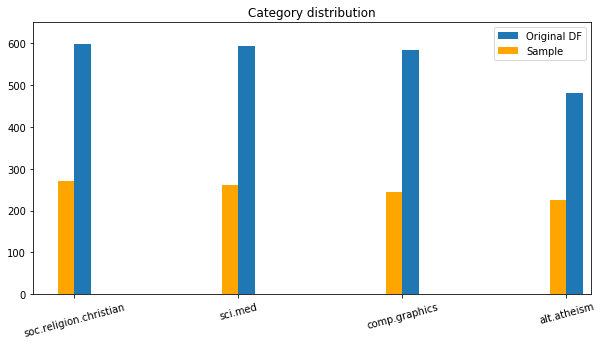

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline



# plot barchart for X ,setting the bar width to 10% from all width reserved to a category and align bars from original  to right edge
#creating label for legend
X.category_name.value_counts().plot(kind = 'bar',  width=0.1, align='edge', label='Original DF')
# plot barchart for X_sample ,setting the bar width to 10% from all width reserved to a category and align bars  to left  edge
#creating label for legend, customizing the figure
X_sample.category_name.value_counts().plot(kind = 'bar', title = 'Category distribution',  color='orange', width=-0.1, 
                                        align='edge', label='Sample', ylim = [0, 650],
                                        rot = 15, fontsize = 10, figsize = (10,5))


plt.legend() #adding a legend for a chart, I hope there was a way to create it somehow else, but its only one i found at matplotlib.org

Now, Creating the matrix of vectors using skilearn lib, with main difference from the master notebook, that we will use stop_words filter integrated into vectorizer:<br/>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(X.text)

<br/>
<br/>
<br/>
<br/>
<br/>


### **>>> Exercise 10 (take home):**
<font color=#7e008c>We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.</font>

If count our goal for that exercise as to find the word for second value "1" in the vector for the fifth text, lets apply the next code:

In [8]:
#lets store the matrix for 5th text as a 1d arraty. skipping the first value as we need second "1" value
temp_array=X_counts[4:5, 1:100].toarray()[0] 

#now check all the values in the given range until we find index of the "1", 
#then apply this index for "get_feature_names"


for i in range(99):
    if temp_array[i]==1:
        thewordwelookfor=vectorizer.get_feature_names()[i] 
thewordwelookfor

'00pm'

<br/>
<br/>
<br/>
<br/>
<br/>

### **>>> Exercise 11 (take home):** 
<font color=#7e008c>From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization</font>

Above, here is the code, copied from the lab notebook with following changes:
1. Set the sample of 100 docs and 5000 terms to see the whole picture
2. Set the bigure figure size and switch off the annotanion for better visualisaion

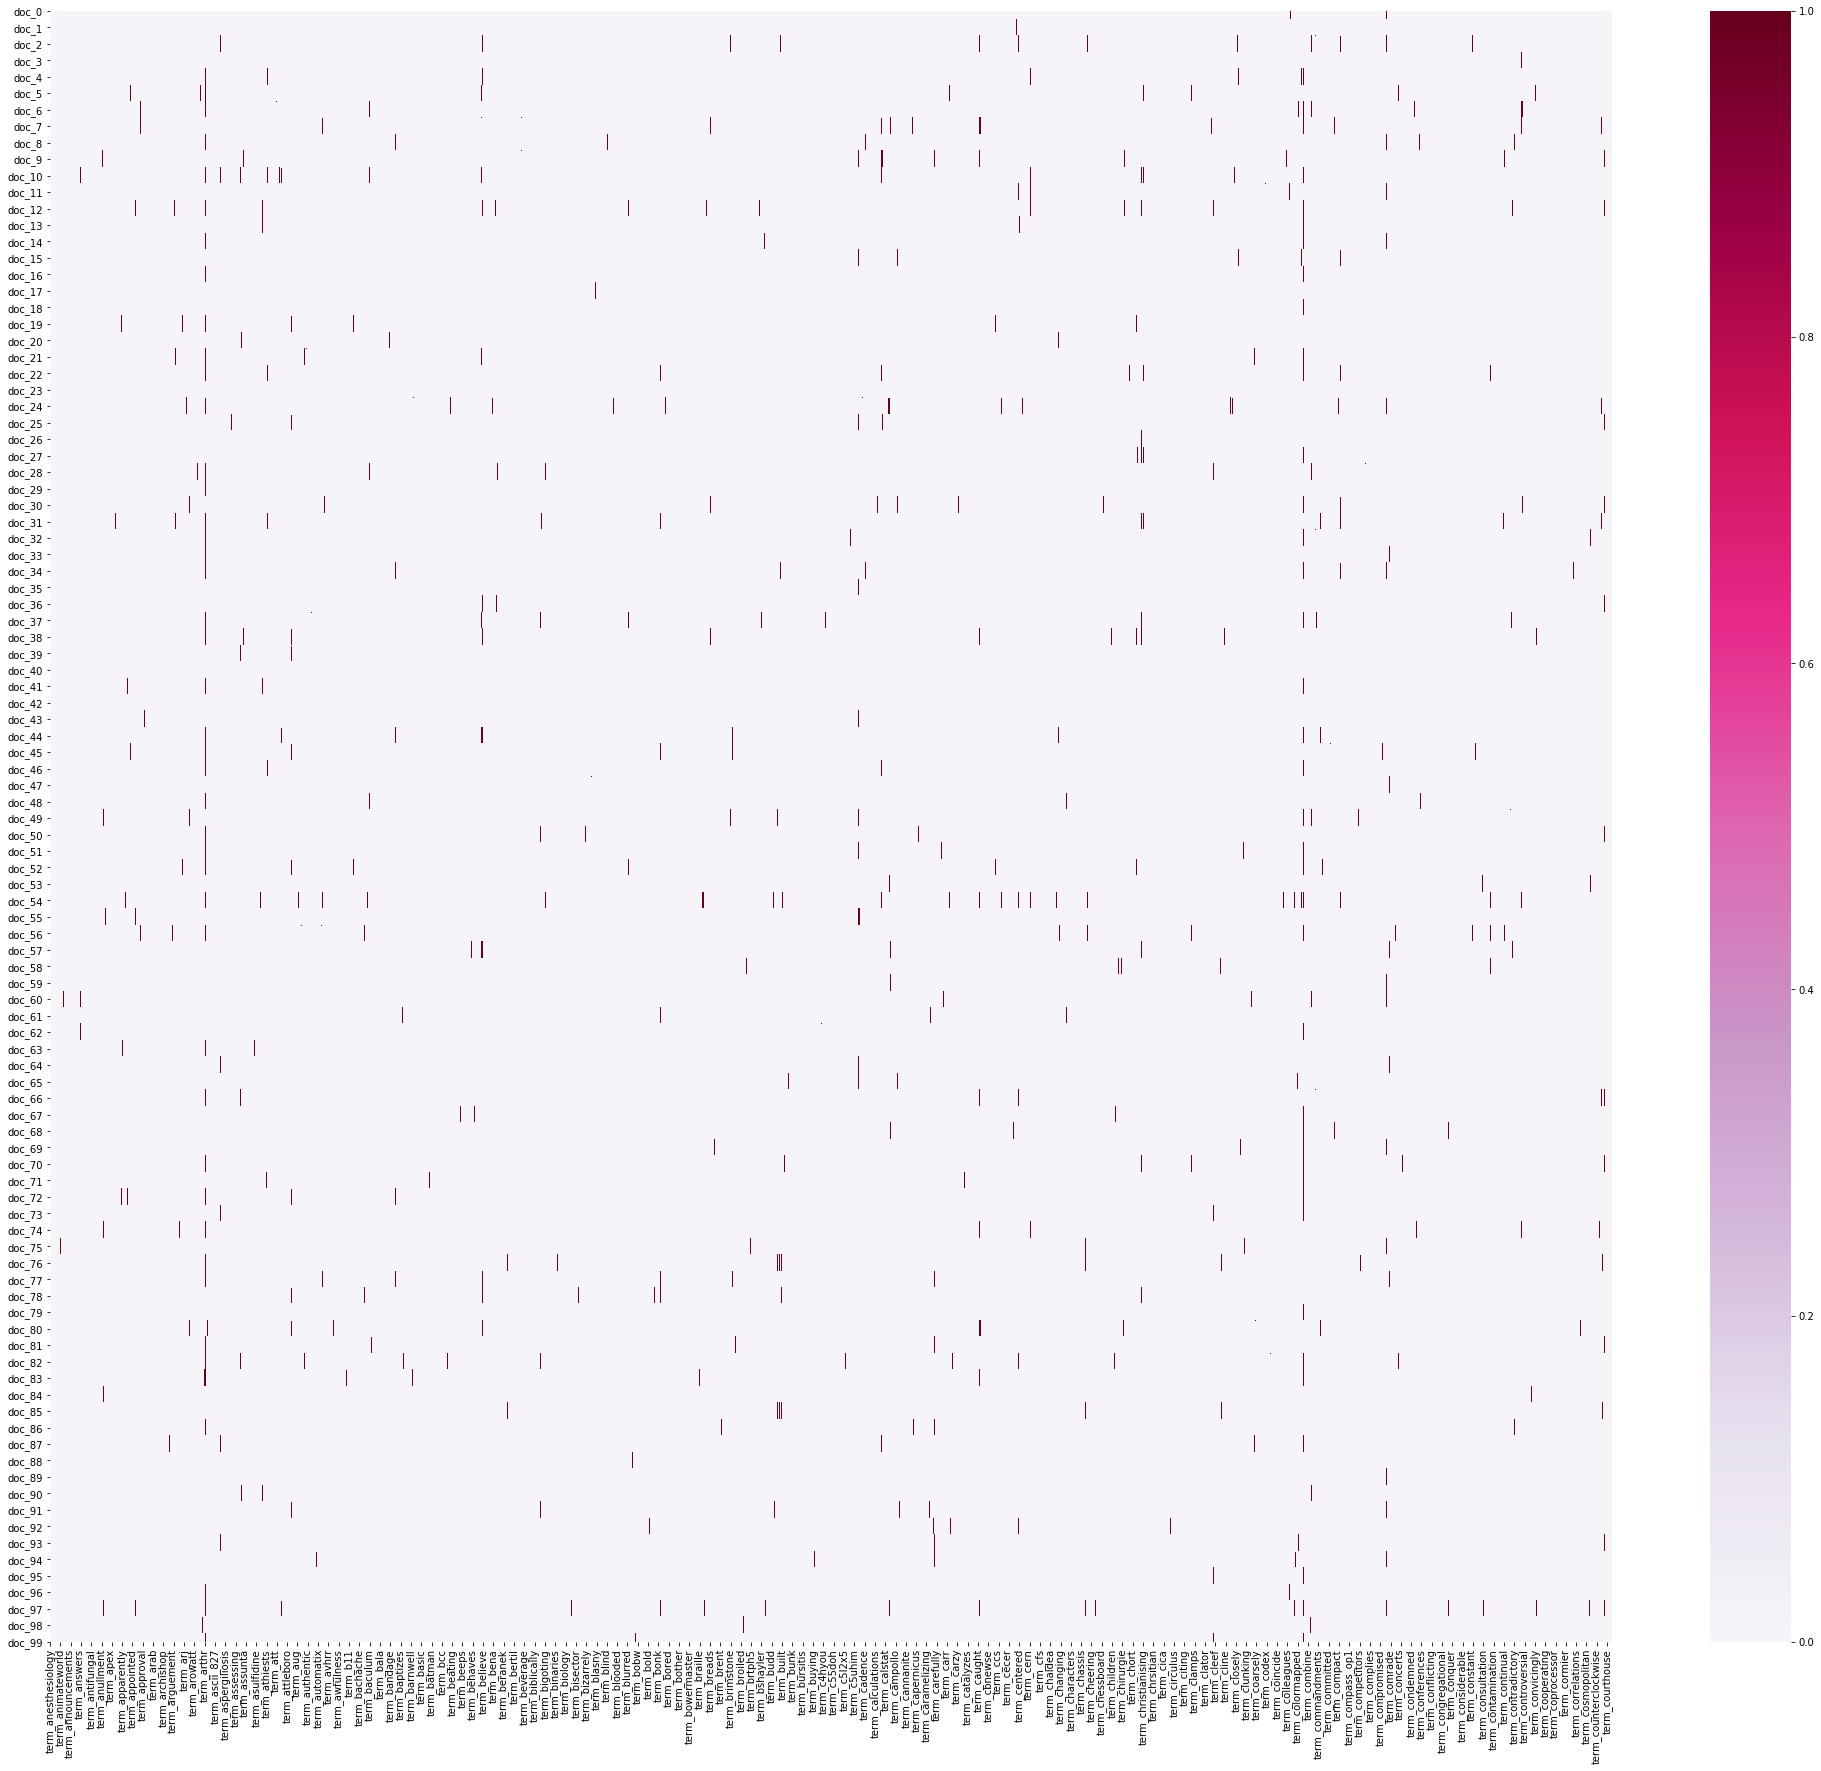

In [10]:
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()[5000:10000]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 5000:10000].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(35, 30))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)

As we can see, the terms are shown in the visualisation are aproximatelly in the alphabeticall range from "A" to "C".
As we could expect, there are many vertical lines, what means that even for letters "A" and "C" there are many words what appears at least once in a significant part of documents. 
<br/><br/> For visualization, depending on what kind of problem I am trying to solve -find features in common between categoties or patterns inside them i would do one the following:

__For features in common between or distinguishing categories:__

Calculated for new vector for each category, each vector would be sum of N doc vectors (N is equal for each category, the biggest N possible for all of them). Also, to make a visualisation more clear it probaly worth to include into that not all the words, but N most frequent of them, those that appear in significant number of texts. (This method is applied in a 3rd section).

__For patterns inside of category:__

Make separate canvas for each category, eliminate columns with all values equal to zero, as it represents word appearing in other categories only; increase the Vmax value to estimate word frequency





<br/>
<br/>
<br/>
<br/>
<br/>






### >>> Exercise 12 (take home):
<font color=#7e008c>Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.</font>

This exercise is done, taking the code from lab as base, and axes 3d docomuntation, describing how to use Axis properties. Comments at the code are providing more details:

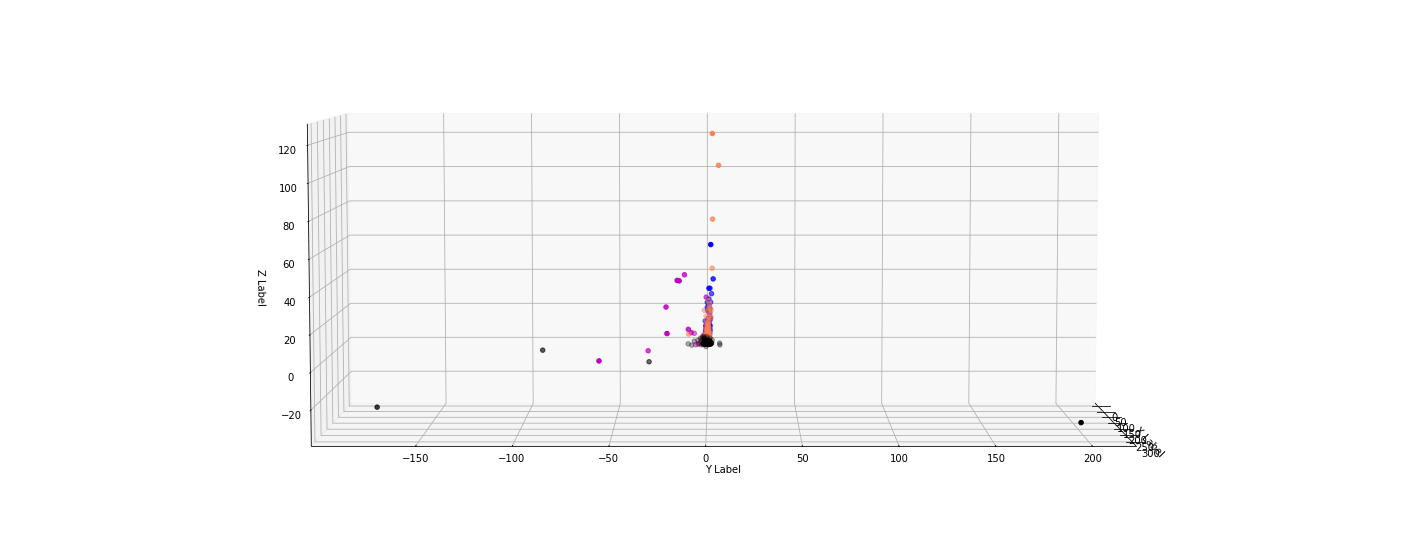

In [11]:
#importing PCA and Axes3D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 


#Creating set of 3 components values out of vectors

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

#setting colors that will be used for categories
col = ['coral', 'blue', 'black', 'm']

# making 3d plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')


#assigning axes and colors for each category
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,  marker='o')

#setting axis and grid look, axis labels.   
ax.view_init(elev=5, azim =0)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

Now will have a look from another angle

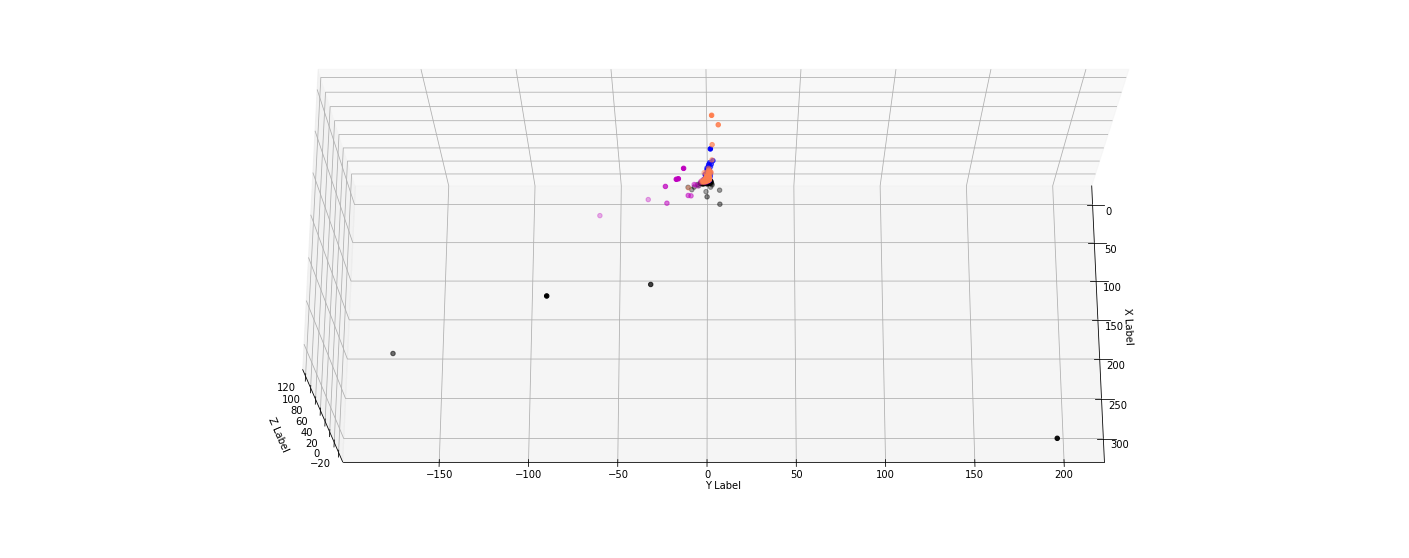

In [12]:
# making 3d plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')


#assigning axes and colors for each category
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,  marker='o')

#setting axis and grid look, axis labels.   
ax.view_init(elev=70, azim =0)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

And one more (manipulating with azim and elev values): 

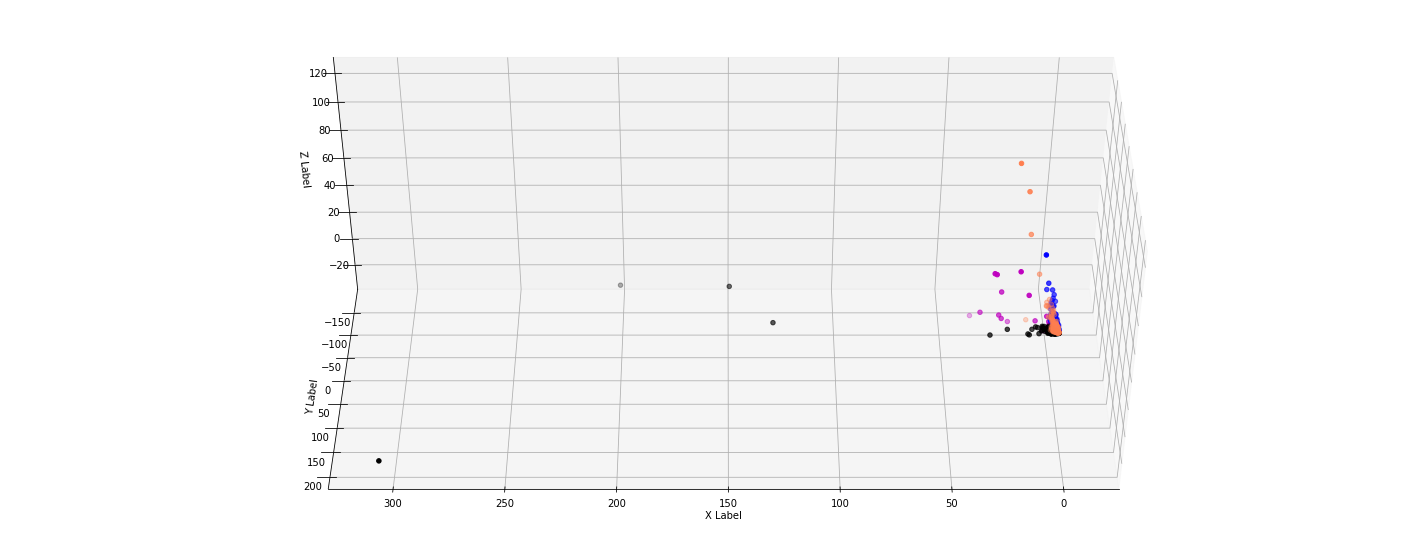

In [15]:
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')


#assigning axes and colors for each category
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c,  marker='o')

#setting axis and grid look, axis labels.   
ax.view_init(elev=40, azim =90)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

As we can see from 3 different angles, bringing vectors to 3 PCA components did not really show clear differnce between categories, while purple category is a bit shifted to negative Y value, and there are also some orange and black outlayers, majority of objects are grouped tight to each other.
<br/>
<br/>
<br/>
<br/>
<br/>

### >>> **Exercise 13 (take home):**
<font color=#7e008c>If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.</font>

<br/> <br/>
To make a new visualisation with plotly, let's decrease number of terms to look at, pickimg only most frequent of them.<br/>

In [30]:
#creating array with all words and sum of occurances of each of them
sum_words = X_counts.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#getting top 200
common_words = words_freq[:200]

#now split it to a temp frame using pandas

top200=pd.DataFrame(common_words, columns=["Word", "Freq"])
top200

,Word,Freq
0,edu,4675
1,subject,2464
2,lines,2353
3,god,2216
4,organization,2192
...,...,...
195,makes,234
196,love,233
197,ask,232
198,questions,231


Now we can make a bar chart. It won't look so clear with zoom equal to one, but as we use plotly, we can look closer at any range. 

In [31]:
#creating a plot using plotly, with terms names for X axis, and number of its occurences for Y.
#using just first 3000.
import plotly.graph_objects as go

fig = go.Figure(    
    go.Bar(x=top200.Word, y=top200.Freq),
    layout_title_text="Terms total occurances"
)

fig.show()


<br/>
<br/>
<br/>
<br/>
<br/>

### >>> **Exercise 14 (take home):** 
<font color=#7e008c>The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. </font>


<br/><br/>
The one way how to decrease the number of terms on the visualisation is demonsstrated enough. Now let's decrease it even more, applying filters, accessable with plotly.io.<br/><br/>

In [39]:
import plotly.io as pio

#preparing the data for a figure, setting sourses for axis, and transformations, applying to that
data = [dict(

  x=top200.Word, y=top200.Freq,

  transforms = [dict(
    type = 'filter',
    target = 'y',
    operation = '>',
    value = 50
  ), dict(
    type = 'filter',
    target = 'y',
    operation = '<',
    value = 3000
  )]
)]


#setting the fig dict for plotly.io to output 
#(I have to accept, I did not understand why i can not apply transform to a regular plotly figure
#and why so many nested dict are required, but trying to skip that, i was getting errors
fig_dict = dict(data=data)

pio.show(fig_dict, validate=False)

<br/>
<br/>
<br/>
<br/>
<br/>        

### >>> **Exercise 15 (take home):** 
<font color=#7e008c>Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below</font>

We already have got the long tail above, but to demonstrate that it could be reached sorting the values another way, we can make following example with "reflection" of long tail:

In [109]:

fig = go.Figure(    
    go.Bar(x=top200.sort_values(by='Freq', ascending=True)['Word'], 
           y=top200.sort_values(by='Freq', ascending=True)['Freq']),
    
)

fig.show()


<br/><br/><br/><br/>
### >>> **Exercise 16 (take home):**
<font color=#7e008c>Try to generate the binarization using the `category_name` column instead. Does it work?</font>

As the issue is simple, so;ution is simple as well, above we are copying code from master notebook, replacing 'category' with 'category_name'. And, answering the question, yes, it works.

In [185]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [186]:
X

,text,category,category_name,length,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,686,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,1004,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,3200,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,609,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,966,"[0, 0, 0, 1]"
...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,923,"[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,7544,"[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,3412,"[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,19372,"[0, 0, 1, 0]"


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

   
## Section 2
(Same process for new dataset)
<br/>
<br/>
<br/>
<br/>
<br/>
First of all, as the dataset looks like the plain text and, moreover, consist of 3 different files, let's open all 3 files (imdb, amazon and yelp), split each of them to corelated sets of sentences and scores and combine it into one sub-dataframe, then concat them all. 

(I know that we could use .split("\t") method to split each line, but i found following one more convinient)



In [110]:
import pandas as pd
#declaring arrays to store scores and reviews
scores_y=[]
scores_i=[]
scores_a=[]
rev_i=[]
rev_y=[]
rev_a=[]

#making subdataframe for imdb, with columns of scores, reviews, and category with same default value
text=open("imdb_labelled.txt", 'r')
for x in text:
    scores_i.append(x[-2])
    rev_i.append(x[:-5])

imdb_dict={"review":rev_i, "score":scores_i}
imdb_df=pd.DataFrame(imdb_dict, columns=["review", "score"])
imdb_df['category']='imdb'


#now, same for yelp reviews
text=open("yelp_labelled.txt", 'r')
for x in text:
    scores_y.append(x[-2])
    rev_y.append(x[:-5])
    
yelp_dict={"review":rev_y, "score":scores_y}
yelp_df=pd.DataFrame(yelp_dict, columns=["review", "score"])
yelp_df['category']='yelp'


#and for  amazon
text=open("amazon_cells_labelled.txt", 'r')
for x in text:
    scores_a.append(x[-2])
    rev_a.append(x[:-5])

                                         
amazon_dict={"review":rev_a, "score":scores_a}
amazon_df=pd.DataFrame(amazon_dict, columns=["review", "score"])
amazon_df['category']='amazon'


#Now combine them all into one Dataframe, with new index

Reviews=pd.concat([yelp_df, amazon_df, imdb_df], ignore_index=True)
Reviews.reindex(axis=1)
Reviews

,review,score,category
0,Wow... Loved this plac,1,yelp
1,Crust is not goo,0,yelp
2,Not tasty and the texture was just nast,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0,imdb
2996,"Unfortunately, any virtue in this film's produ...",0,imdb
2997,"In a word, it is embarrassing.",0,imdb
2998,Exceptionally bad!,0,imdb


<br/>
<br/>
Now, checking for missing and duplicated values. 



In [111]:
import helpers.data_mining_helpers as dmh
Reviews.isnull().apply(lambda x: dmh.check_missing_values(x))

review      (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object

In [112]:
sum(Reviews.duplicated('review'))

18

As we found that there are duplicated rows, lets drop all of them, keeping originals

In [113]:
Reviews.drop_duplicates(keep='first', inplace=True)
len(Reviews)

2982

<br/>
<br/>
<br/>
Now lets make a sample, and visualize the volume of each category in original dataset and in sample one.

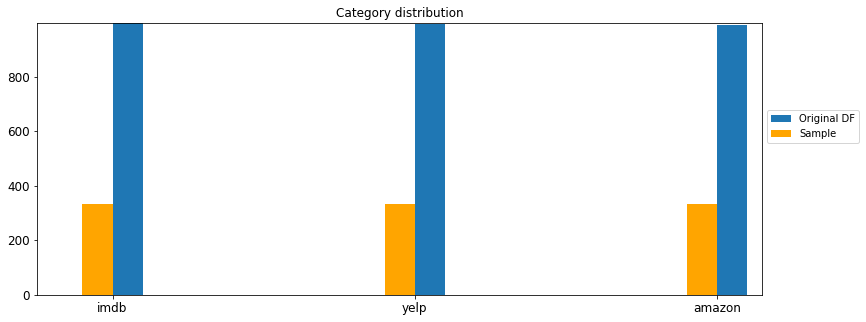

In [114]:
R_sample=Reviews.sample(n=1000)

import matplotlib.pyplot as plt
%matplotlib inline


Reviews.category.value_counts().plot(kind = 'bar',  width=0.1, align='edge', label='Original DF')  

R_sample.category.value_counts().plot(kind = 'bar', title = 'Category distribution',  color='orange', width=-0.1, 
                                        align='edge', label='Sample', ylim = [0, max(Reviews.category.value_counts())], 
                                        rot=0, fontsize = 12, figsize = (13,5))

#setting legend to the right side out of mainplot
plt.legend(bbox_to_anchor=(1, 0., 0., 0.7))         

<br/>
<br/>
<br/>
The next step is to create Unigrams using data_mining helpers. As it was recomended, I have edited the dmh file,  switching the stopwords removing on, and also added few more custom stop-words to an a nltk english stopwords corpus, then called it as a list in a dmh, where I also added the line turning each token to lower case.

In [115]:
import helpers.data_mining_helpers as dmh

Reviews['unigrams'] = Reviews['review'].apply(lambda x: dmh.tokenize_text(x))
Reviews

,review,score,category,unigrams
0,Wow... Loved this plac,1,yelp,"[wow, ..., loved, plac]"
1,Crust is not goo,0,yelp,"[crust, goo]"
2,Not tasty and the texture was just nast,0,yelp,"[tasty, texture, nast]"
3,Stopped by during the late May bank holiday of...,1,yelp,"[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,1,yelp,"[selection, menu, great, price]"
...,...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0,imdb,"[got, bored, watching, jessice, lange, take, c..."
2996,"Unfortunately, any virtue in this film's produ...",0,imdb,"[unfortunately, virtue, film, production, work..."
2997,"In a word, it is embarrassing.",0,imdb,"[word, embarrassing, .]"
2998,Exceptionally bad!,0,imdb,"[exceptionally, bad]"


<br/>
<br/>
<br/>
Now, we are vectorizing our reviews. The main difference from the lab is that now stop words are sorted out. While sometimes some words can also be parts of patterns, it will allow us to decrease a dimensionality at least a bit.
<br/><br/>
Another difference from the lab work, as in this case we are creating a vector matrix for good IMDB reviews only, as it also will allow us to reduce number of dimensions and see patterns for good reviews more clear.

<br/><br/>



In [116]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer for good reviews
c_v_g_i = CountVectorizer(stop_words='english')


R_counts_good_i = c_v_g_i.fit_transform(Reviews[(Reviews.score == '1') & (Reviews.category=='imdb')].review)


And now we are generating the heatmap for good reviews vector matrix.

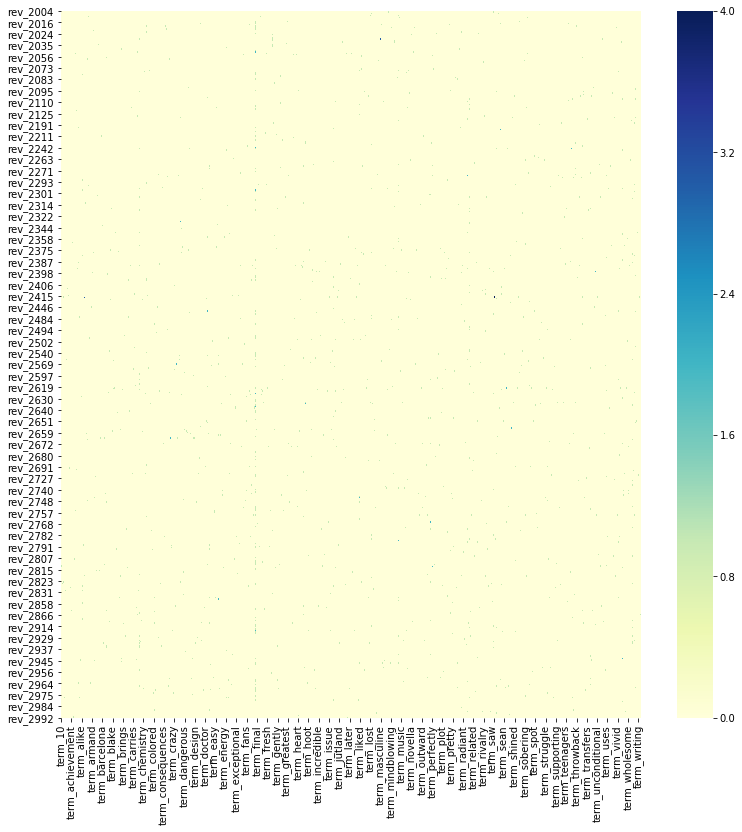

In [119]:
plot_x = ["term_"+str(i) for i in c_v_g_i.get_feature_names()]
plot_y = ["rev_"+ str(i) for i in list(Reviews[(Reviews.score == '1') & (Reviews.category=='imdb')].index)]
plot_z = R_counts_good_i.toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(13, 13))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 annot=False)

As we can see on the heat map, here is an obvious vertical line. But the data is still too sparsed to make any conclusion. <br/><br/><br/><br/> <br/><br/><br/><br/><br/> <br/>
Now it's time for 3d visualisation using of PCA.
Instead of heatmap, for this step lets use not good imdb reviews subset, but the whole dataset grouped by category to see differnce between them.

For that, we have to  create new vector matrix.


In [120]:
#creating a new vector matrix removing stop words with sklearn tools
c_v = CountVectorizer(stop_words='english')
R_counts=c_v.fit_transform(Reviews.review)


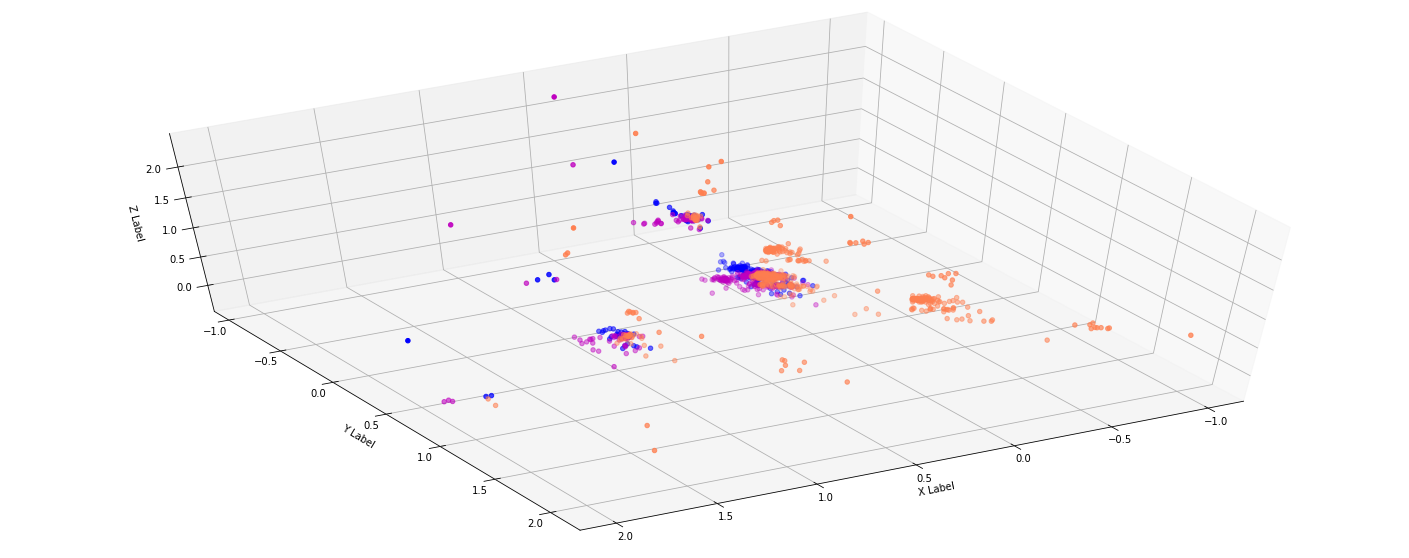

In [121]:


#importing PCA and Axes3D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 


#Creating set of 3 components values out of vectors

R_reduced = PCA(n_components = 3).fit_transform(R_counts.toarray())

#setting colors that will be used for categories
col = ['coral', 'blue', 'm']
categories = ['imdb', 'amazon', 'yelp']

# making 3d plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')


#assigning axes and colors for each category
for c, x in zip(col, categories):
    xs = R_reduced[(Reviews['category'] == x)].T[0]
    ys = R_reduced[(Reviews['category'] == x)].T[1]
    zs = R_reduced[(Reviews['category'] == x)].T[2]
    
    ax.scatter(xs, ys, zs, c=c,  marker='o')

#setting axis and grid look, axis labels.   
ax.view_init(elev=55, azim =60)
ax.grid(color='white', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()



Well, maybe it worth to leave on the plot only positive reviews of each category.

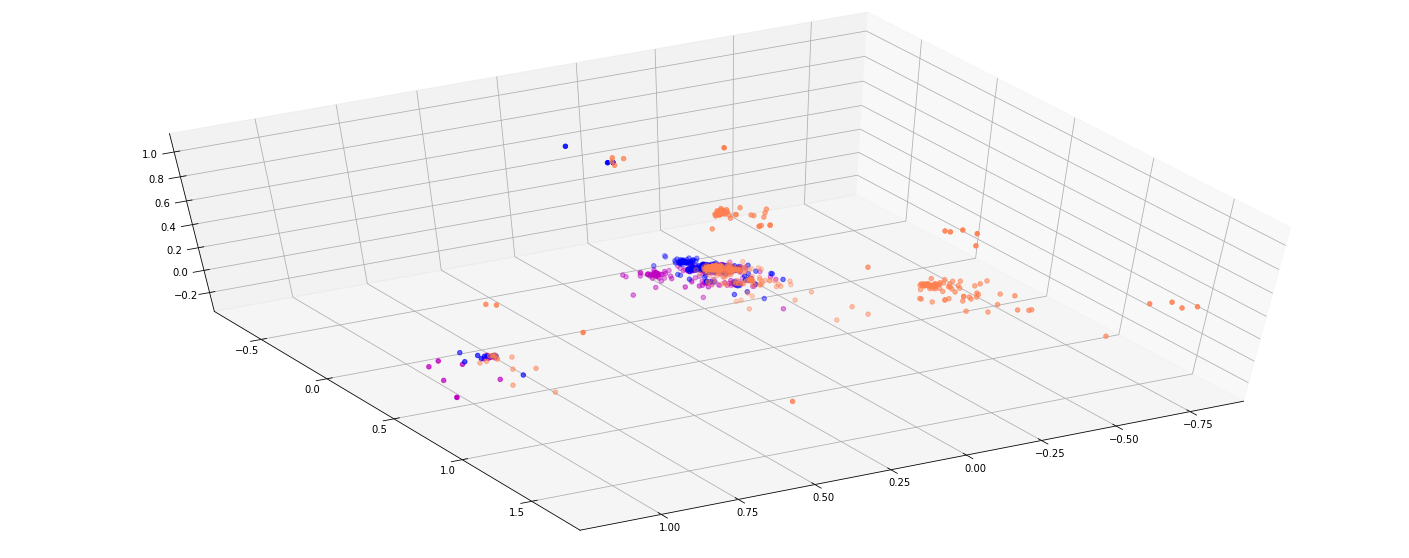

In [122]:
 #Creating set of 3 components values out of vectors

R_reduced = PCA(n_components = 3).fit_transform(R_counts.toarray())

#setting colors that will be used for categories
col = ['coral', 'blue', 'm']
categories = ['imdb', 'amazon', 'yelp']

# making 3d plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')


#assigning axes and colors for each category
for c, x in zip(col, categories):
    xs = R_reduced[(Reviews['category'] == x) & (Reviews['score'] == '0')].T[0]
    ys = R_reduced[(Reviews['category'] == x) & (Reviews['score'] == '0')].T[1]
    zs = R_reduced[(Reviews['category'] == x) & (Reviews['score'] == '0')].T[2]


    ax.scatter(xs, ys, zs, c=c,  marker='o')

ax.view_init(elev=55, azim =60)

plt.show()

As we can see  there is still no obvious difference between categories with application of PCA method, even while there are group of imdb reviews staying separately from others, and probably for that dataset it worth to use another methods. 
<br/><br/><br/><br/>

## Section 3

(Additional manipulations with new dataset)
<br/><br/>
First of all, to make a new visusalization, lets find out 200 most popular words in whole corpus.

In [123]:
import plotly

sum_words = R_counts.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in c_v.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    

common_words = words_freq[:200]

#create a framework W_d for words distribution
W_d = pd.DataFrame(common_words, columns = ['Word' , 'count_total'])
W_d

,Word,count_total
0,good,199
1,movie,182
2,great,176
3,film,163
4,phone,132
...,...,...
195,taste,13
196,server,13
197,vegas,13
198,tim,13


<br/><br/>
What are we about to do is a bit complicated, and, perhaps, has a simpler way to do. 
<br/><br/>
As we already have the new dataframe with frequency of 200 top words, to check distibution of that words between categories we will do following step:
<br/><br/>For each of six categories (imdb-good, imdb-bad, amazon-good, etc) we will create a new sum vector (like we did for seaborn heatmap visualization).
Then, from each of that vector we will extract the value for each of 200 most frequent words. <br/><br/>

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
#making summarizing vectors

c_v_c = CountVectorizer(stop_words='english')
c_v_c.fit(Reviews.review)

R_g_i=c_v_c.transform(Reviews[(Reviews.score == '1') & (Reviews.category=='imdb')].review).toarray()
sum_g_i = R_g_i.sum(axis=0)

R_b_i=c_v_c.transform(Reviews[(Reviews.score == '0') & (Reviews.category=='imdb')].review).toarray()
sum_b_i = R_b_i.sum(axis=0)

R_g_y=c_v_c.transform(Reviews[(Reviews.score == '1') & (Reviews.category=='yelp')].review).toarray()
sum_g_y = R_g_y.sum(axis=0)

R_b_y=c_v_c.transform(Reviews[(Reviews.score == '0') & (Reviews.category=='yelp')].review).toarray()
sum_b_y = R_b_y.sum(axis=0)

R_g_a=c_v_c.transform(Reviews[(Reviews.score == '1') & (Reviews.category=='amazon')].review).toarray()
sum_g_a = R_g_a.sum(axis=0)

R_b_a=c_v_c.transform(Reviews[(Reviews.score == '0') & (Reviews.category=='amazon')].review).toarray()
sum_b_a = R_b_a.sum(axis=0)




In [126]:
#extracting frequency for each of 200 words and then joining the dataframe 
#(_gi is for "good imdb", "_ba" is for "bad amazon")


#creating arrays to store each word frequency for a separate category
wfgi=[]
wfbi=[]
wfgy=[]
wfby=[]
wfga=[]
wfba=[]

#for each word add number of its occurances for each category list
i=c_v_c.vocabulary_
for word in common_words:
    y=word[0]
    x=i[y]
    wfgi.append(sum_g_i[x])
    wfbi.append(sum_b_i[x])
    wfgy.append(sum_g_y[x])
    wfby.append(sum_b_y[x])
    wfga.append(sum_g_a[x])
    wfba.append(sum_b_a[x])

#assigning arrays with word frequencies as new columns 
W_d['imdb_good']=wfgi
W_d['imdb_bad']=wfbi
W_d['yelp_good']=wfgy
W_d['yelp_bad']=wfby
W_d['amazon_good']=wfga
W_d['amazon_bad']=wfba
W_d


,Word,count_total,imdb_good,imdb_bad,yelp_good,yelp_bad,amazon_good,amazon_bad
0,good,199,40,18,55,15,59,12
1,movie,182,86,96,0,0,0,0
2,great,176,37,4,63,0,69,3
3,film,163,105,58,0,0,0,0
4,phone,132,0,0,0,0,66,66
...,...,...,...,...,...,...,...,...
195,taste,13,1,0,6,6,0,0
196,server,13,0,0,9,4,0,0
197,vegas,13,0,0,9,4,0,0
198,tim,13,0,0,3,3,4,3


<br/><br/>
As we can see, now we have a new dataframe showing the distibution of top words between categories. Now lets try to use it to see if there any patterns distinguishing positive and bad reviews from each other.
<br/><br/>
First of all, we will try to compare words distribution for good and bad reviews in general.

In [127]:
good_total=[]
bad_total=[]

#calculating sum of occurances for each word in all good reviews
for a, b, c in zip(wfgi, wfgy, wfga):
    good_total.append(a+b+c)
    
#calculating sum of occurances for each word in all bad reviews
for a, b, c in zip(wfbi, wfby, wfba):
    bad_total.append(a+b+c)


#making a heatmap
import plotly.graph_objects as go



fig = go.Figure(data=go.Heatmap(
                   z=[good_total, bad_total],
                   y=['good reviews', 'bad reviews'],
                   x=W_d['Word']))
fig.show()



<br/><br/>
As we can see from plot above, many of most popular words are used in one category much more often, most obvious examples are "great"(169vs7), "bad" (3vs93), love (54vs5). But even between less popular words there are many what belong to only one category, like, for example, "perfect"(16vs0), "horrible"(0vs18), "terrible"(1vs25) and "awesome" (16vs0) 
<br/><br/>

Now apply the same method to see the difference betwwen category
<br/><br/>

In [128]:
i_total=[]
y_total=[]
a_total=[]

#calculating sum of occurances for each word in all imdb reviews
for a, b in zip(wfgi, wfbi):
    i_total.append(a+b)
    
#calculating sum of occurances for each word in all yelp reviews
for a, b in zip(wfgy, wfby):
    y_total.append(a+b)
    
#calculating sum of occurances for each word in all amazon reviews
for a, b in zip(wfga, wfba):
    a_total.append(a+b)


#making a heatmap

fig = go.Figure(data=go.Heatmap(
                   z=[i_total, y_total, a_total],
                   y=['imdb reviews', 'yelp reviews', 'amazon reviews'],
                   x=W_d['Word']))
fig.show()



<br/><br/>
As we can see above, there are also some key words, specific for special categories, like "movie", "film", "totally" (that was surprising actually), "funny", "character" for imdb or "food", "place", "service", "chicken", "pizza" etc for "yelp".
<br/><br/>
Now it's time to extract tf-idf features, based on original reviews.
<br/><br/><br/>


In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english')
text_tf= tf.fit_transform(Reviews['review'])


In [23]:
text_tf.shape

(2982, 5353)

<br/><br/><br/>
And just two last steps to finish this long homework: building classifiers.<br/> We have two matrixes: "R_counts" for word frequency, and "text_tf" with tfidf features. Now lets build two classifiers based on them.<br/><br/>

In [130]:
from sklearn.naive_bayes import MultinomialNB

#tfidf classifier
clf_tf = MultinomialNB().fit(text_tf, Reviews.category)
#word frequnecy classifier
clf_fr = MultinomialNB().fit(R_counts, Reviews.category)

<br/>The next step is to test that classifiers. I have created the set of random simple reviews as a list "test_r". First let's try to test the word frequency classifier on that:<br/><br/>

In [131]:
test_r = ['The food was great, but we didnt really like that we had to wait so long for our order', 'nice pizza, great service', 'Horrible movie with predictable twists', 'really disapointed with that device']

test_r_wf = c_v_c.transform(test_r)


predicted = clf_fr.predict(test_r_wf)

predicted

array(['yelp', 'yelp', 'imdb', 'amazon'], dtype='<U6')

And with tfidf:<br/> 

In [132]:
test_r_tfidf = tf.transform(test_r)

predicted = clf_tf.predict(test_r_tfidf)

predicted

array(['yelp', 'yelp', 'imdb', 'amazon'], dtype='<U6')

As the sample reviews were pretty simple and common, now we got 4 out of 4 accuracy for both classifiers, of course, for a large dataset it probably will be uch further from 100% value, but, at least, classifiers are working, and i can proudly declare that the homework is finally over.
Thank you for attention, and let me apologise for all the mistakes I have made in that.
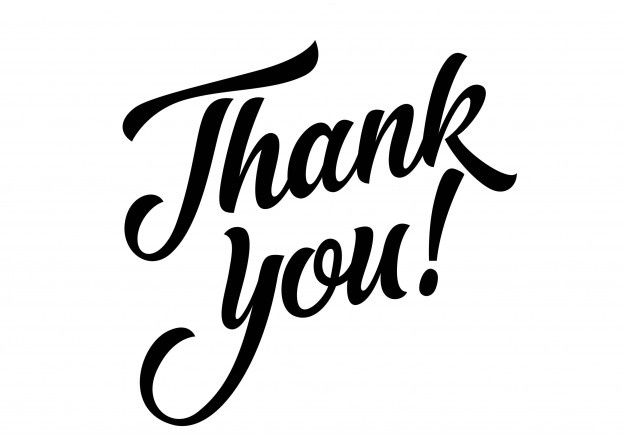